In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams['axes.titlesize'] = 16
plt.style.use('seaborn-whitegrid')
sns.set_palette("Set2")

C:\Users\User\AppData\Local\Temp\ipykernel_20676\683685668.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# PROBLEM-1_LINEAR REGRESSION

##  The comp-activ databases is a collection of a computer systems activity measures .The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 
## As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

### 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis. 

In [3]:
df = pd.read_excel(r'C:\Users\User\Downloads\compactiv.xlsx')

In [4]:
df.shape

(8192, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [6]:
df['runqsz'].value_counts()

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64

In [7]:
df.isnull().sum()[df.isnull().sum()>0]

rchar    104
wchar     15
dtype: int64

In [8]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [9]:
df.describe(include='all').T

count unique            top  freq            mean            std  \
lread     8192.0    NaN            NaN   NaN       19.559692      53.353799   
lwrite    8192.0    NaN            NaN   NaN       13.106201      29.891726   
scall     8192.0    NaN            NaN   NaN     2306.318237    1633.617322   
sread     8192.0    NaN            NaN   NaN       210.47998     198.980146   
swrite    8192.0    NaN            NaN   NaN      150.058228      160.47898   
fork      8192.0    NaN            NaN   NaN        1.884554       2.479493   
exec      8192.0    NaN            NaN   NaN        2.791998       5.212456   
rchar     8088.0    NaN            NaN   NaN   197385.728363  239837.493526   
wchar     8177.0    NaN            NaN   NaN    95902.992785  140841.707911   
pgout     8192.0    NaN            NaN   NaN        2.285317       5.307038   
ppgout    8192.0    NaN            NaN   NaN        5.977229       15.21459   
pgfree    8192.0    NaN            NaN   NaN       11.919712       32.36352   
pgscan    8192.0    NaN            NaN   NaN       21.526849       71.14134   
atch      8192.0    NaN            NaN   NaN        1.127505       5.708347   
pgin      8192.0    NaN            NaN   NaN         8.27796      13.874978   
ppgin     8192.0    NaN            NaN   NaN       12.388586      22.281318   
pflt      8192.0    NaN            NaN   NaN      109.793799     114.419221   
vflt      8192.0    NaN            NaN   NaN      185.315796     191.000603   
runqsz      8192      2  Not_CPU_Bound  4331             NaN            NaN   
freemem   8192.0    NaN            NaN   NaN     1763.456299    2482.104511   
freeswap  8192.0    NaN            NaN   NaN  1328125.959839  422019.426957   
usr       8192.0    NaN            NaN   NaN       83.968872      18.401905   

             min        25%        50%        75%        max  
lread        0.0        2.0        7.0       20.0     1845.0  
lwrite       0.0        0.0        1.0       10.0      575.0  
scall      109.0     1012.0     2051.5    3317.25    12493.0  
sread        6.0       86.0      166.0      279.0     5318.0  
swrite       7.0       63.0      117.0      185.0     5456.0  
fork         0.0        0.4        0.8        2.2      20.12  
exec         0.0        0.2        1.2        2.8      59.56  
rchar      278.0    34091.5   125473.5  267828.75  2526649.0  
wchar     1498.0    22916.0    46619.0   106101.0  1801623.0  
pgout        0.0        0.0        0.0        2.4      81.44  
ppgout       0.0        0.0        0.0        4.2      184.2  
pgfree       0.0        0.0        0.0        5.0      523.0  
pgscan       0.0        0.0        0.0        0.0     1237.0  
atch         0.0        0.0        0.0        0.6     211.58  
pgin         0.0        0.6        2.8      9.765      141.2  
ppgin        0.0        0.6        3.8       13.8     292.61  
pflt         0.0       25.0       63.8      159.6      899.8  
vflt         0.2       45.4      120.4      251.8     1365.0  
runqsz       NaN        NaN        NaN        NaN        NaN  
freemem     55.0      231.0      579.0    2002.25    12027.0  
freeswap     2.0  1042623.5  1289289.5  1730379.5  2243187.0  
usr          0.0       81.0       89.0       94.0       99.0

In [10]:
num = df.select_dtypes(['float64','int64'])
cat = df.select_dtypes(['object']) 

In [11]:
num.skew()

lread       13.897852
lwrite       5.277645
scall        0.902531
sread        5.459466
swrite       9.605844
fork         2.249689
exec         4.069238
rchar        2.854044
wchar        3.847654
pgout        5.066984
ppgout       4.680442
pgfree       4.768191
pgscan       5.813415
atch        21.542020
pgin         3.242412
ppgin        3.902765
pflt         1.720284
vflt         1.737327
freemem      1.807555
freeswap    -0.791664
usr         -3.416750
dtype: float64

In [12]:
import scipy.stats as stats

In [13]:
def percent_outlier(_series):
    counter = 0
    lb = _series.quantile(0.25)-(1.5*(stats.iqr(_series)))
    ub = _series.quantile(0.75)+(1.5*(stats.iqr(_series)))
    for val in _series:
        if (val>ub) or (val<lb): 
            counter=counter+1
        else : pass
    return 100*counter/len(_series)


In [14]:
def outlier_percentage_df(df, features_list):
    dict_outlier = {}
    for x in features_list:
        dict_outlier[x]=round(percent_outlier(df[x]),4)
    return pd.DataFrame(dict_outlier, index=["% OUTLIERS"]).T.sort_values("% OUTLIERS", ascending=False)

In [15]:
outlier_percentage_df(df,num)

% OUTLIERS
pgscan       21.2891
pgfree       18.9819
ppgout       16.0522
lwrite       15.9302
atch         14.7583
freemem      14.4653
pgout        12.0605
fork         11.5112
ppgin        10.0220
pgin          9.6313
lread         9.1919
exec          8.6670
swrite        6.0425
vflt          5.9082
usr           5.2490
pflt          4.8218
sread         4.1504
freeswap      3.5889
scall         1.3184
wchar         0.0000
rchar         0.0000

In [16]:
def Five_number_Sumamry(column):    
    print('Five number summary of -',column)
    five_num = [df[column].quantile(0), 
            df[column].quantile(0.25), 
            df[column].quantile(0.50), 
            df[column].quantile(0.75), 
            df[column].quantile(1)]
    print ('Minimum:',five_num[0],'\n25%:',five_num[1],'\n50% or Median:',five_num[2],'\n75%:',five_num[3],'\nMaximum:',five_num[4])
    print('IQR:',stats.iqr(df[column])) 
    print("----------------------------------------------------------------------------")

In [17]:
for i in num.columns:
    Five_number_Sumamry(i)

Five number summary of - lread
Minimum: 0.0 
25%: 2.0 
50% or Median: 7.0 
75%: 20.0 
Maximum: 1845.0
IQR: 18.0
----------------------------------------------------------------------------
Five number summary of - lwrite
Minimum: 0.0 
25%: 0.0 
50% or Median: 1.0 
75%: 10.0 
Maximum: 575.0
IQR: 10.0
----------------------------------------------------------------------------
Five number summary of - scall
Minimum: 109.0 
25%: 1012.0 
50% or Median: 2051.5 
75%: 3317.25 
Maximum: 12493.0
IQR: 2305.25
----------------------------------------------------------------------------
Five number summary of - sread
Minimum: 6.0 
25%: 86.0 
50% or Median: 166.0 
75%: 279.0 
Maximum: 5318.0
IQR: 193.0
----------------------------------------------------------------------------
Five number summary of - swrite
Minimum: 7.0 
25%: 63.0 
50% or Median: 117.0 
75%: 185.0 
Maximum: 5456.0
IQR: 122.0
----------------------------------------------------------------------------
Five number summary of - fork

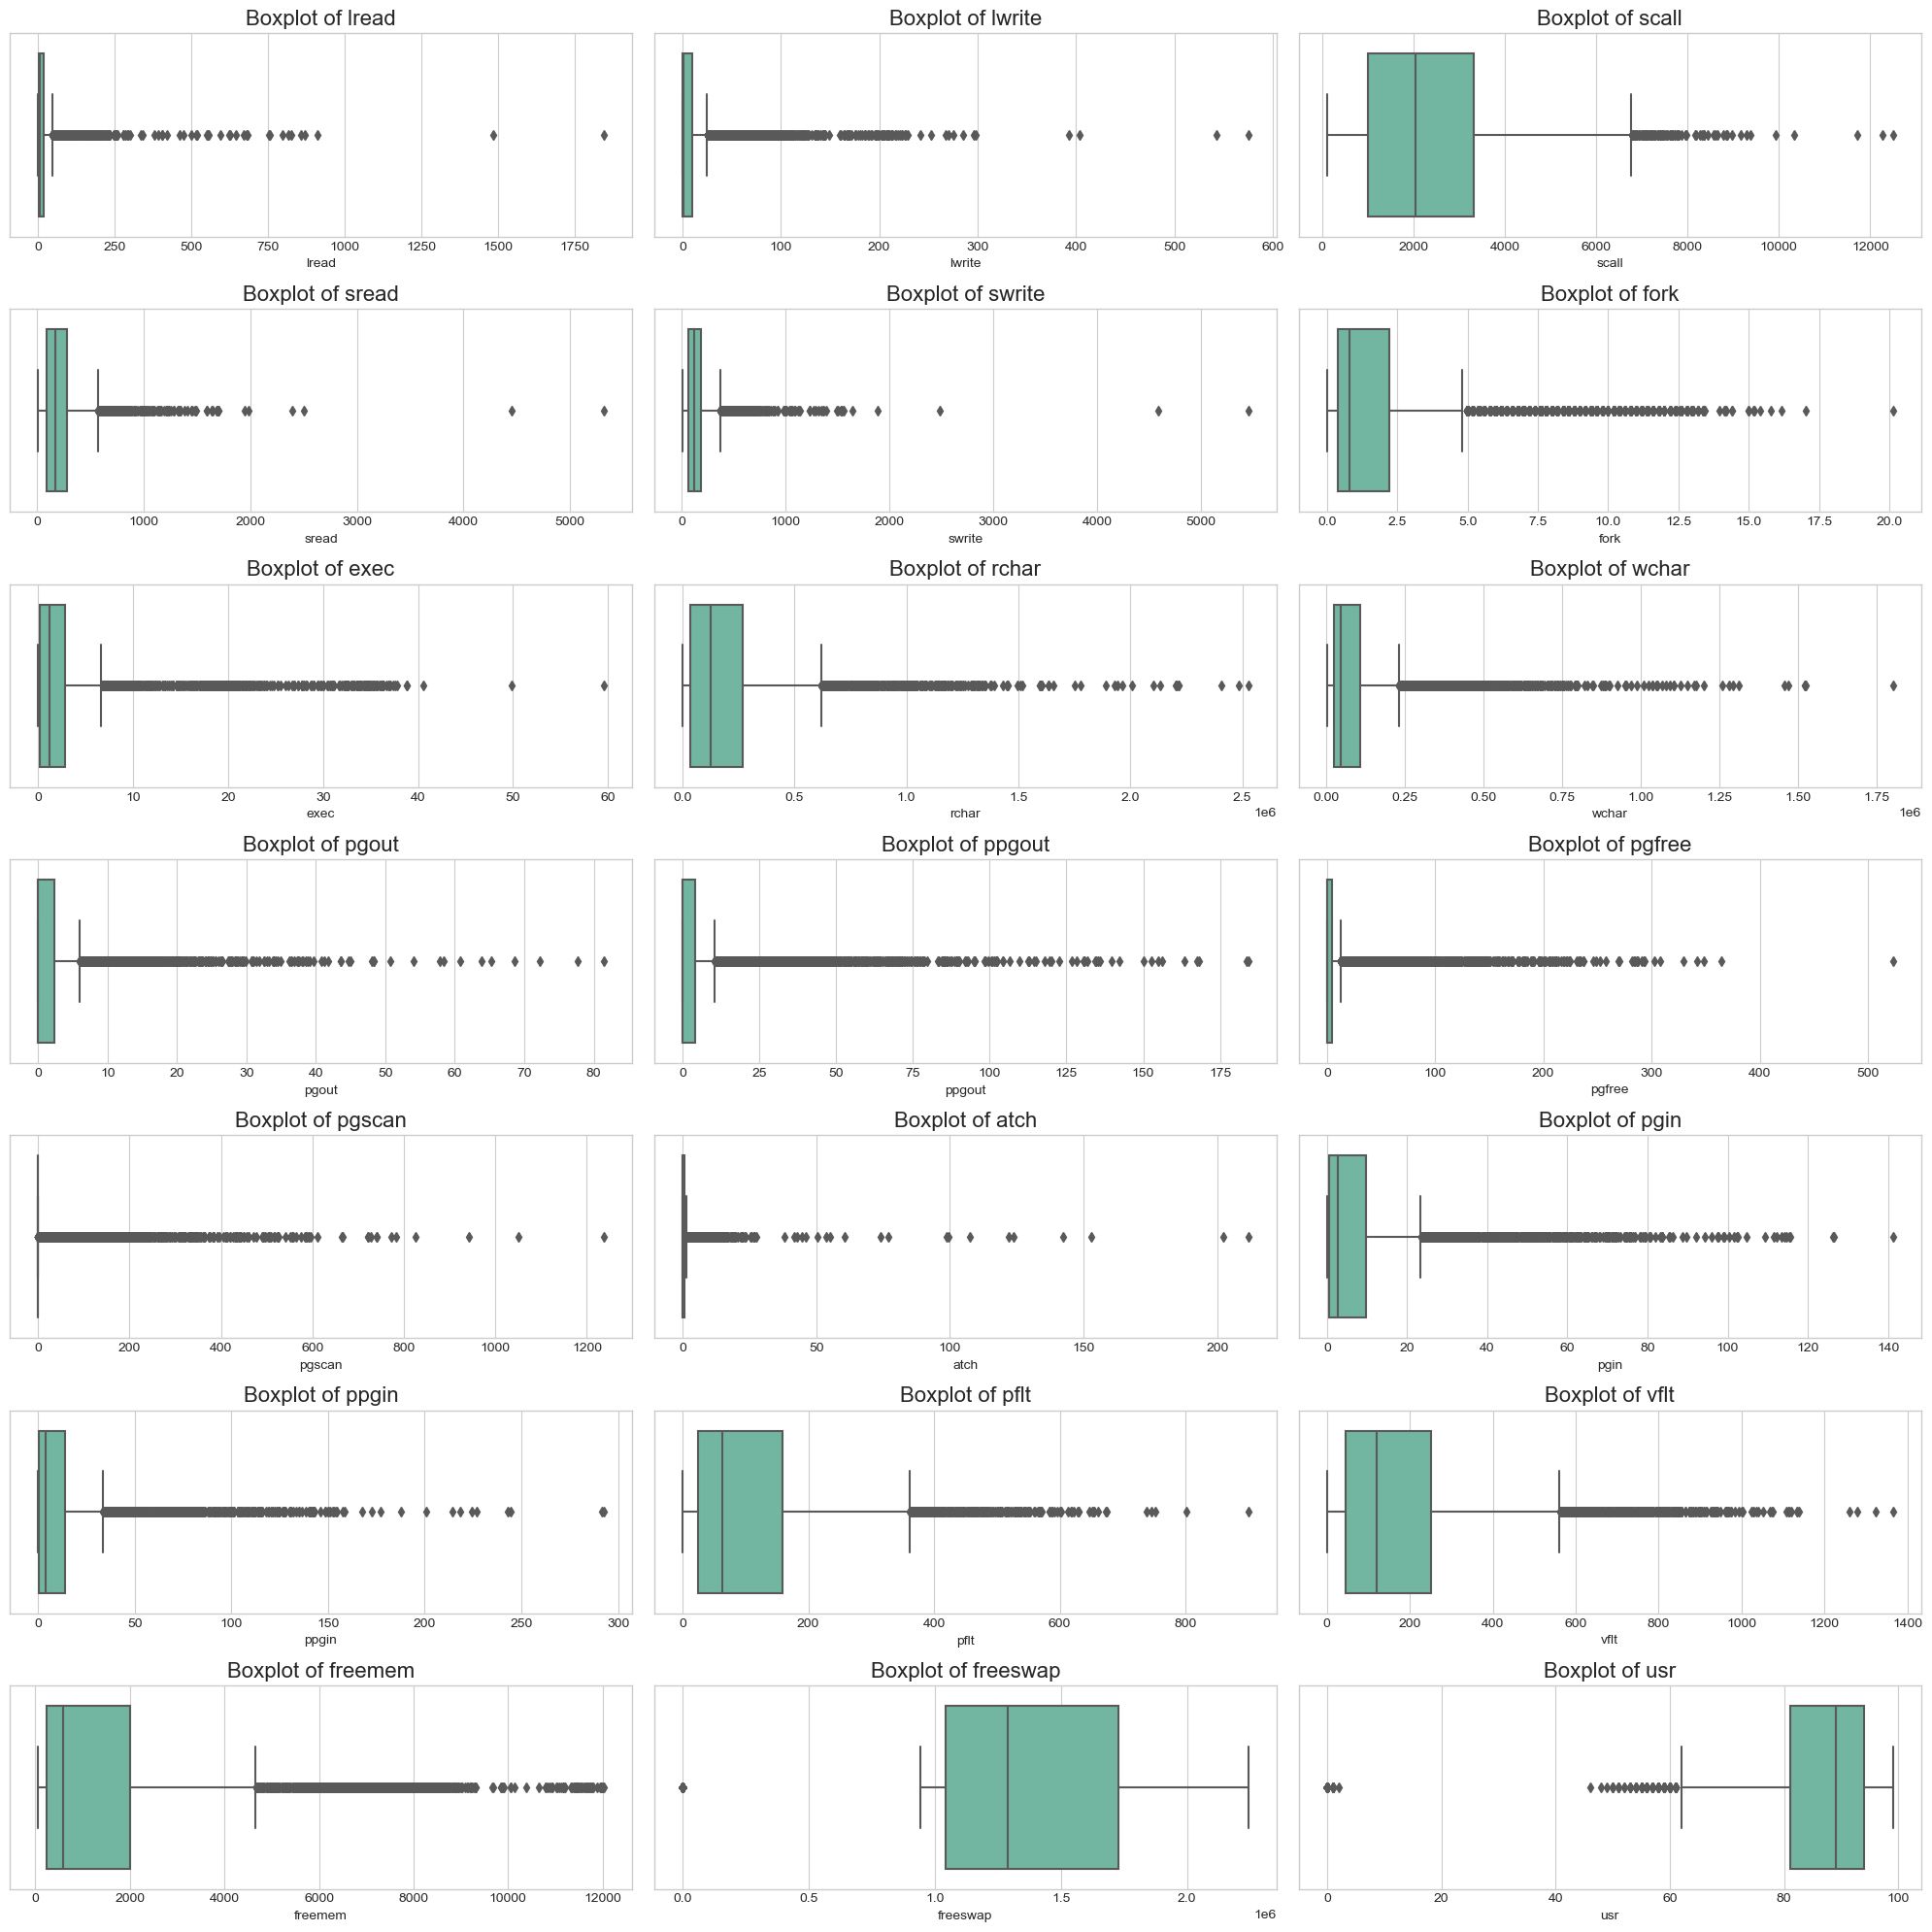

In [18]:
plt.figure(figsize = (20,20))
feature_list = num.columns
for i in range(len(feature_list)):
    plt.subplot(7, 3, i + 1)
    sns.boxplot(x = num[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

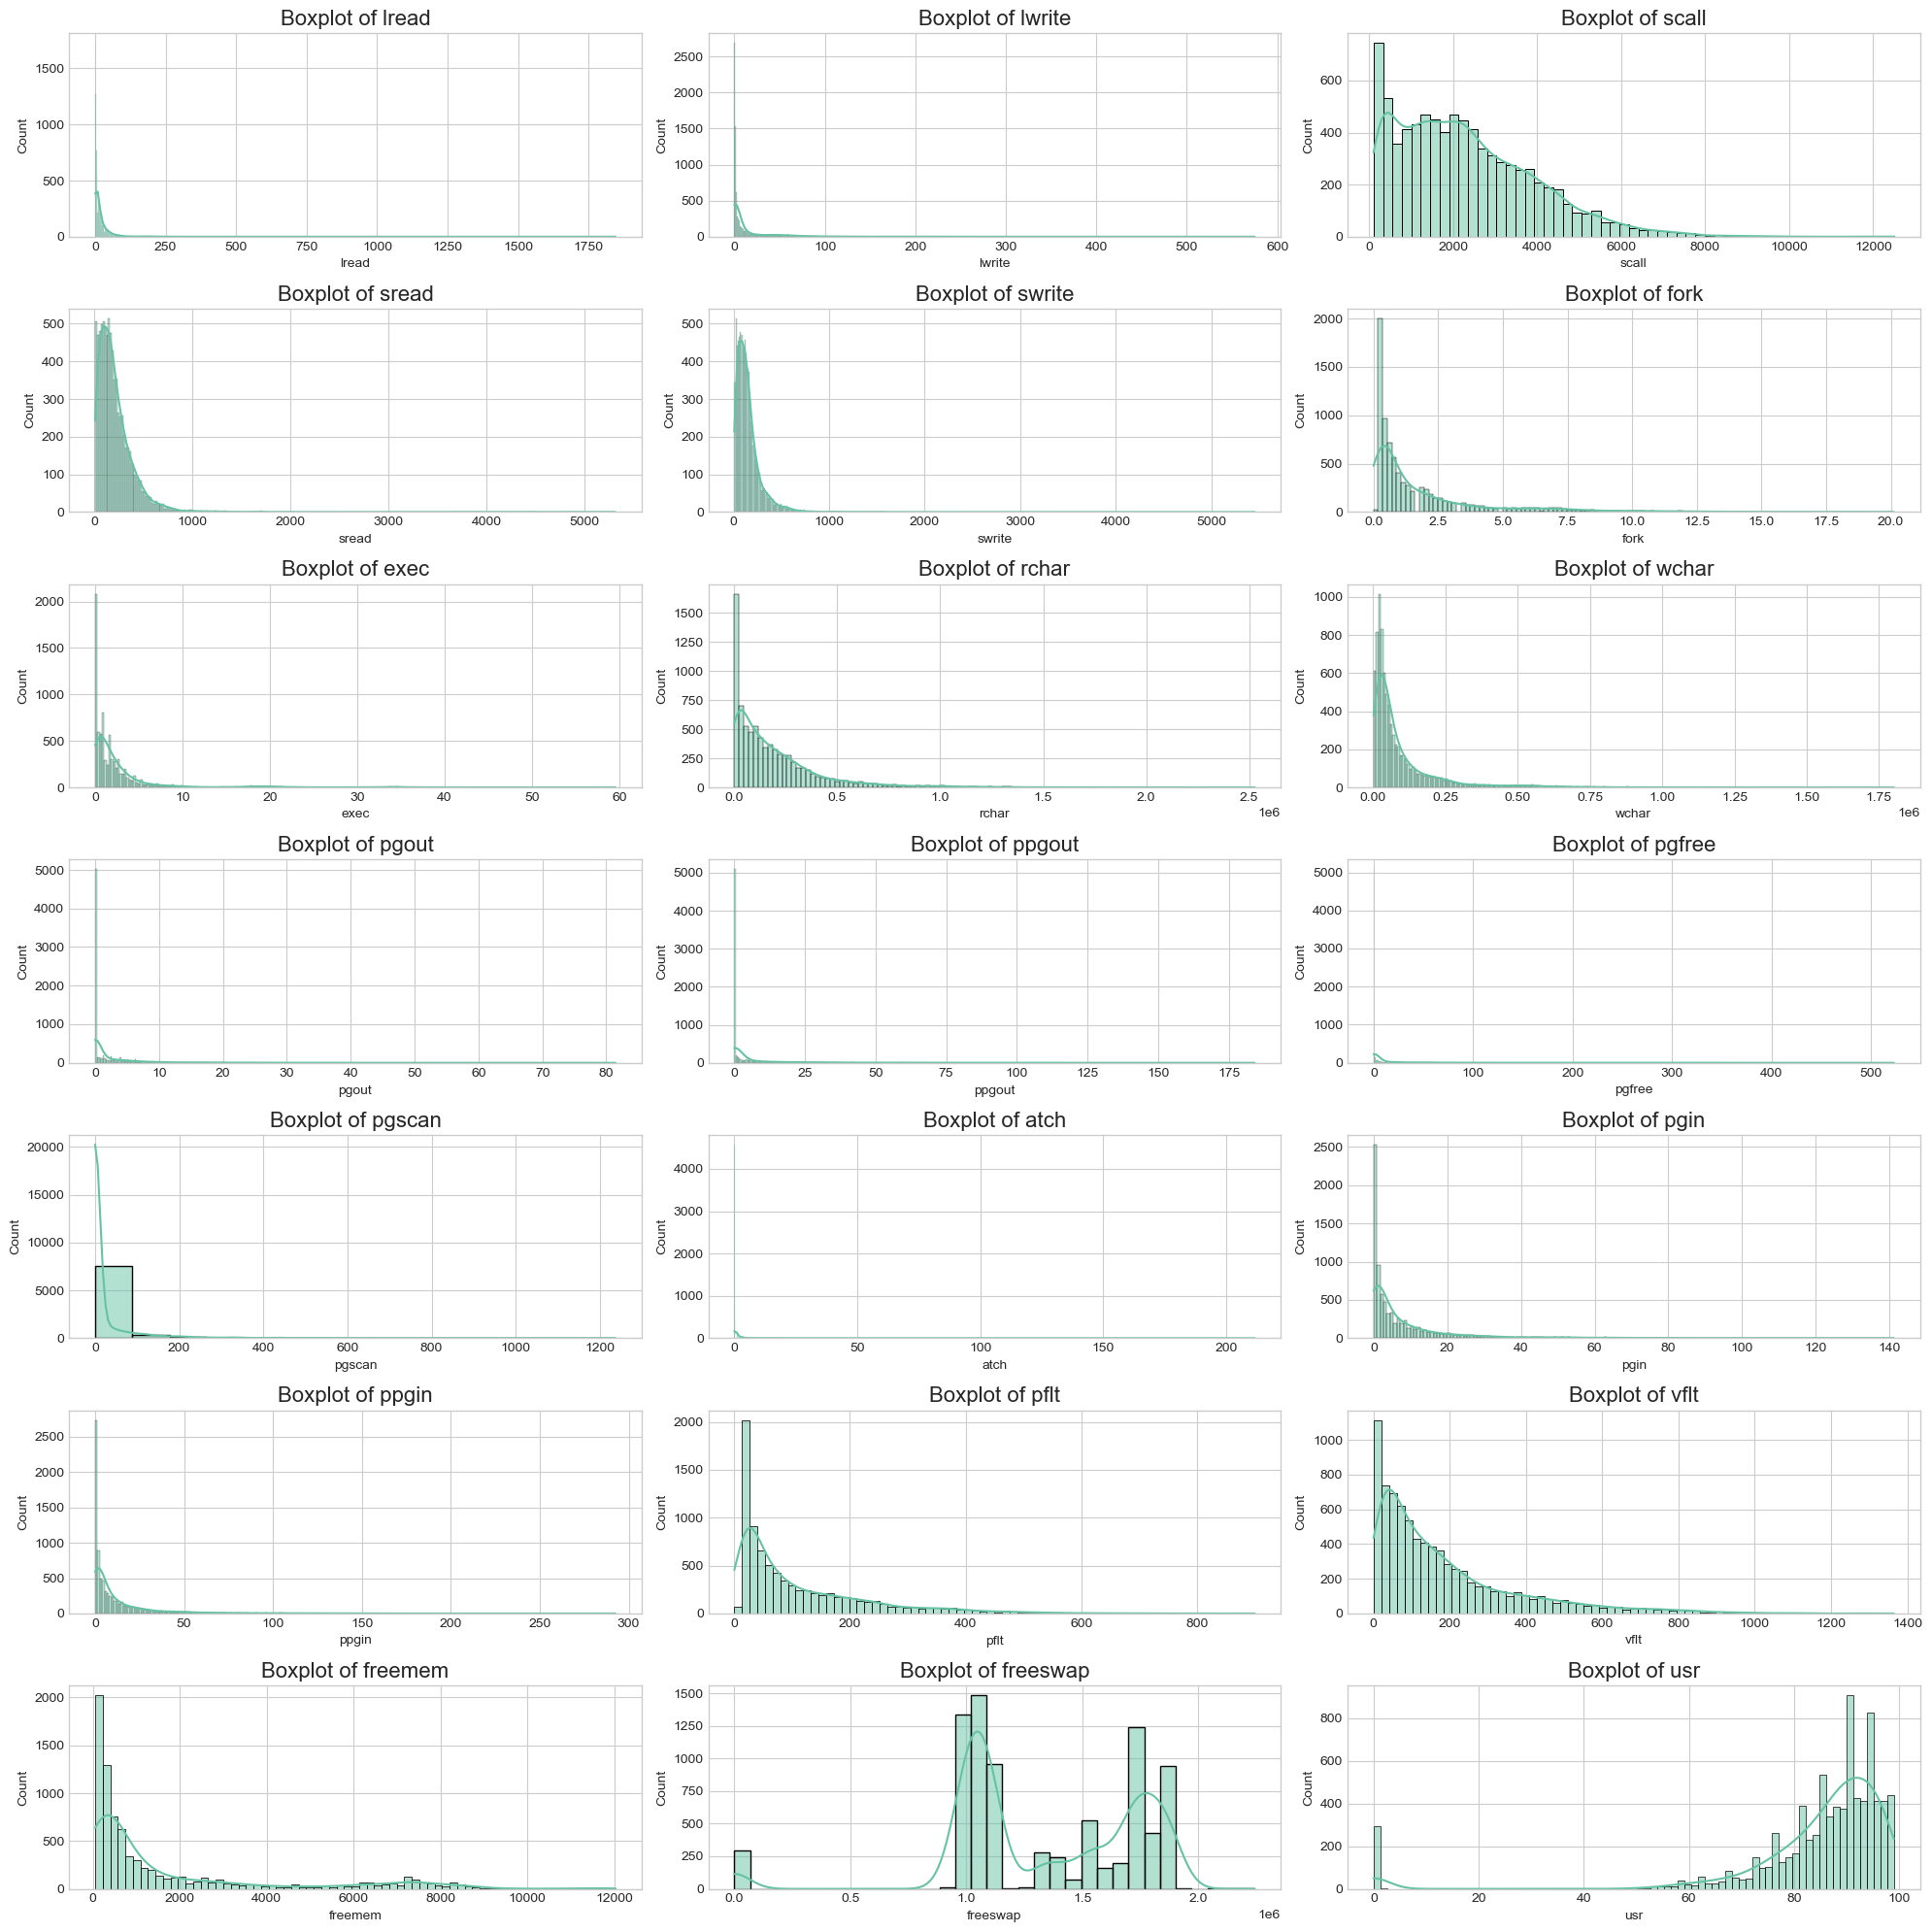

In [19]:
plt.figure(figsize = (20,20))
feature_list = num.columns
for i in range(len(feature_list)):
    plt.subplot(7, 3, i + 1)
    sns.histplot(x = num[feature_list[i]],data=df,kde=True)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

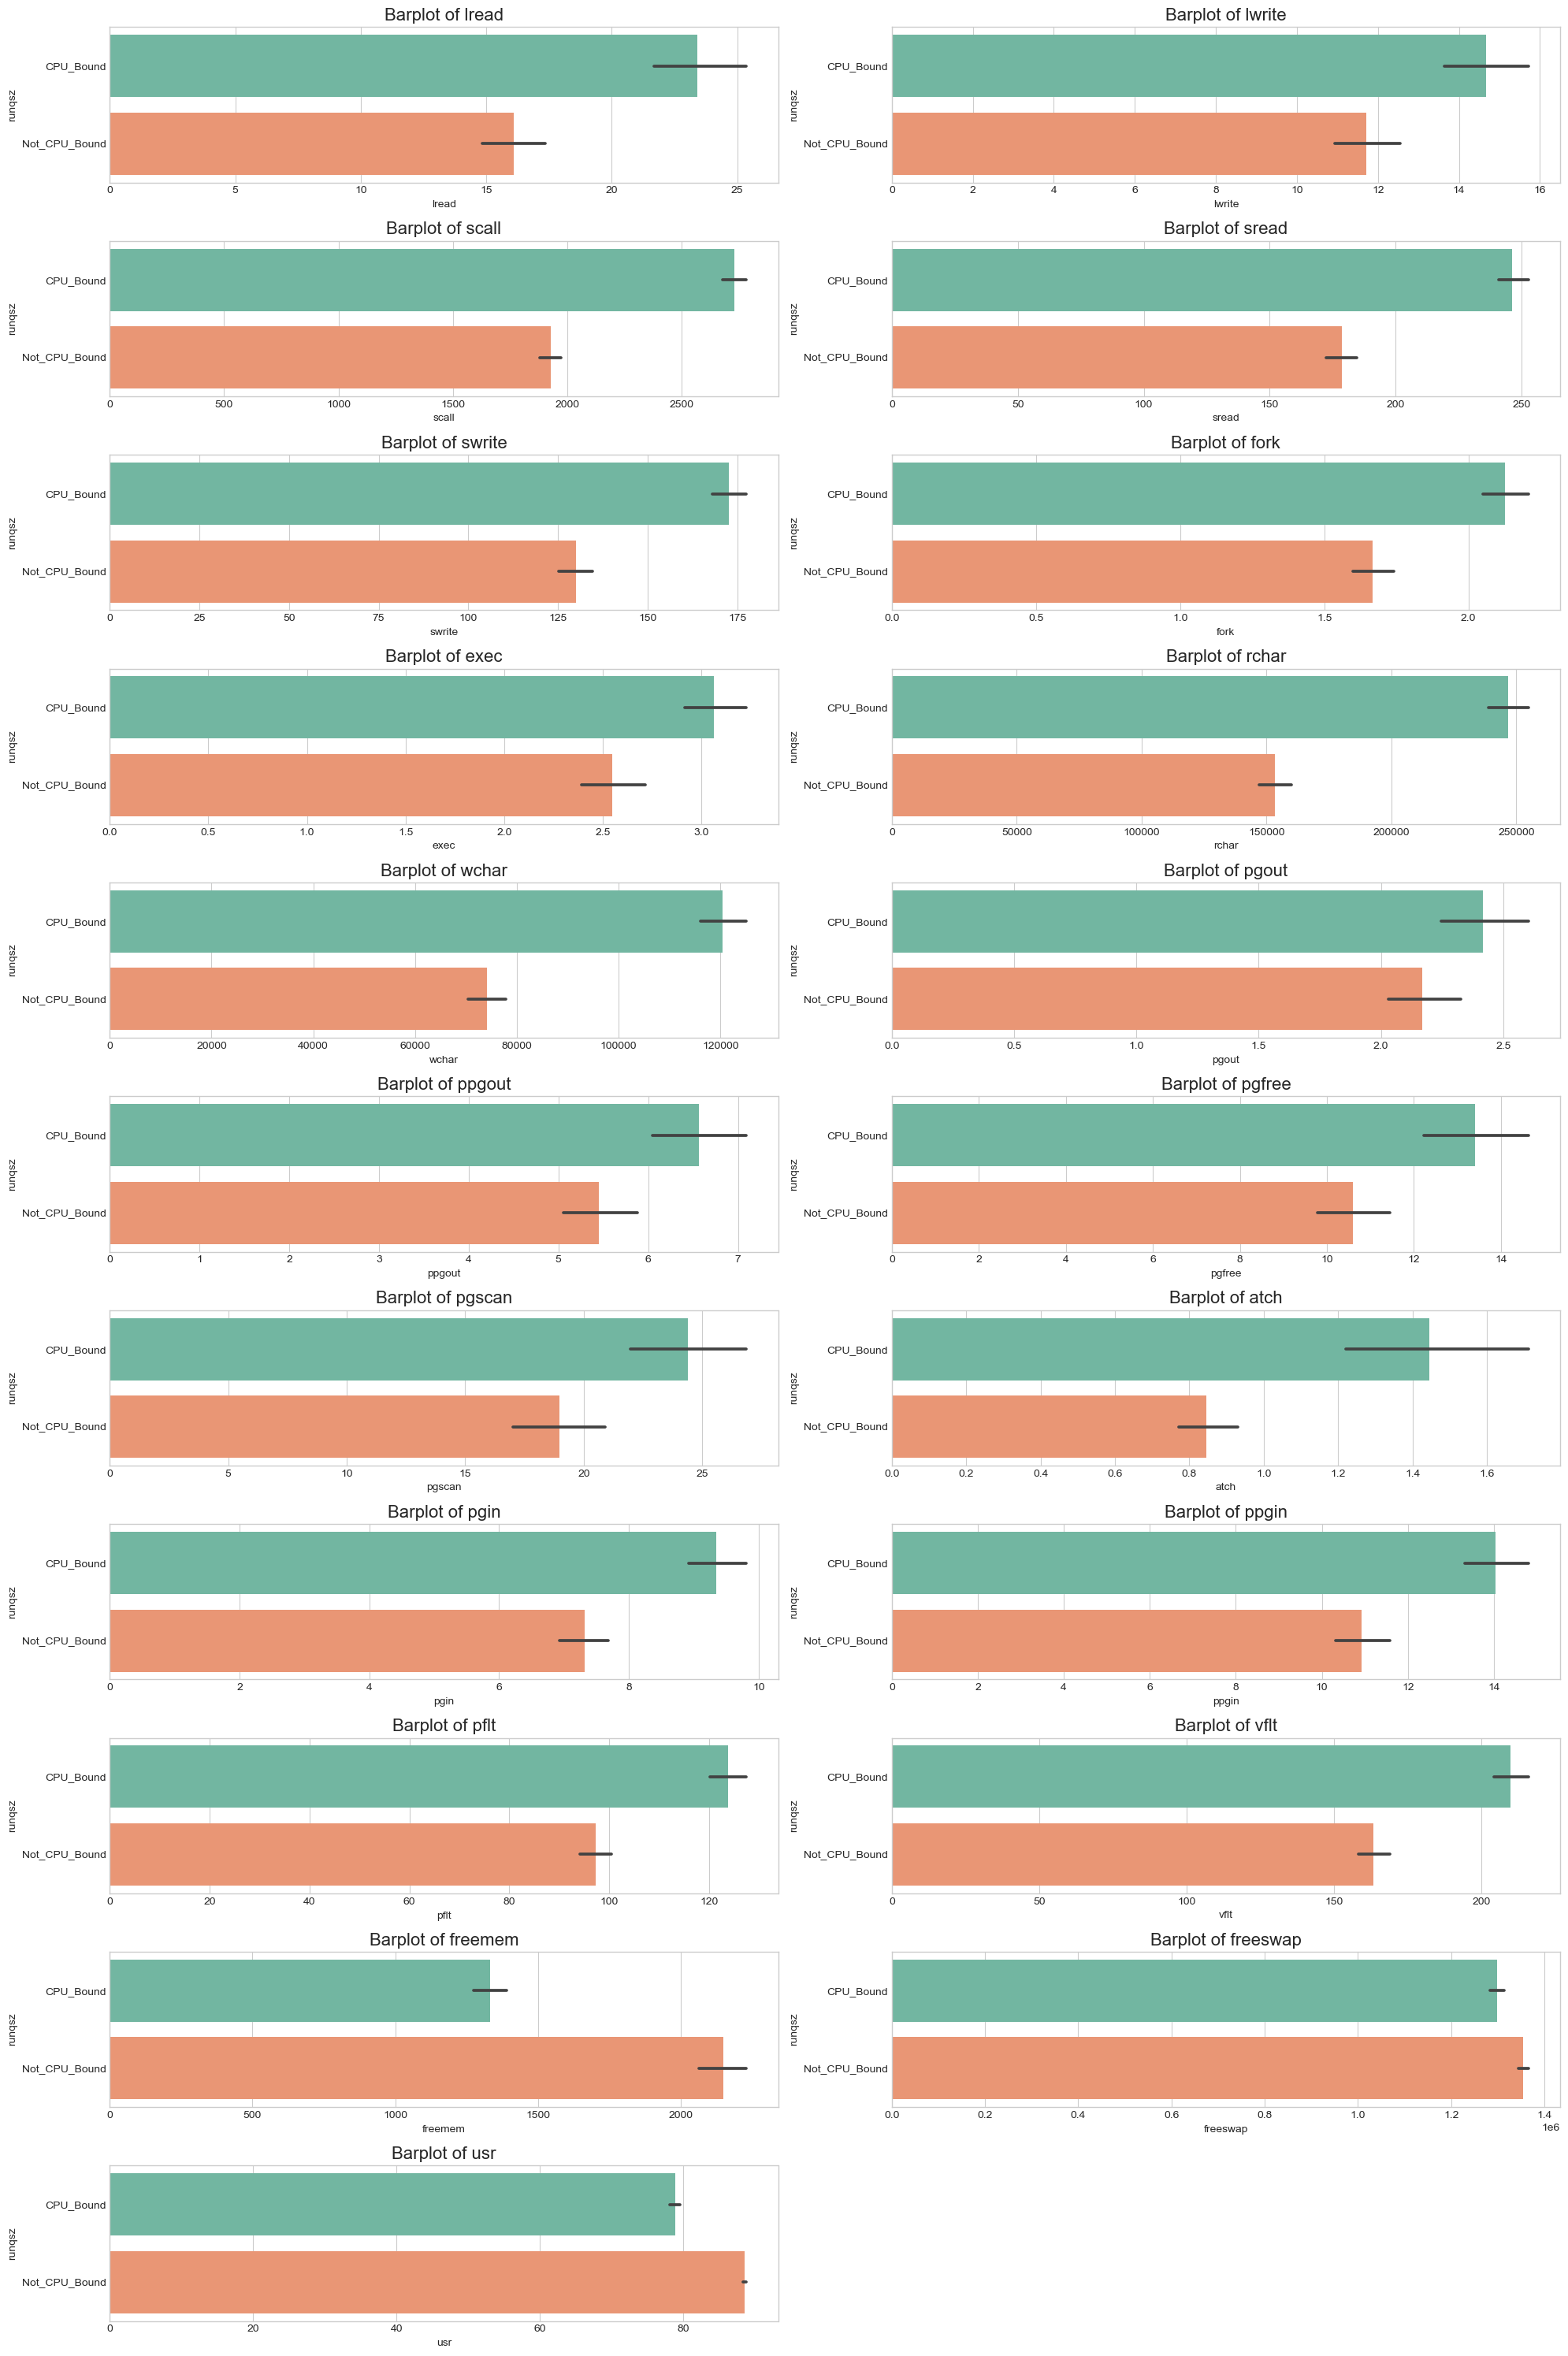

In [20]:
plt.figure(figsize = (20,30))
feature_list = num.columns
for i in range(len(feature_list)):
    plt.subplot(11, 2, i + 1)
    sns.barplot(x = num[feature_list[i]], y = cat['runqsz'],data = df)
    plt.title('Barplot of {}'.format(feature_list[i]))
    plt.tight_layout()

<AxesSubplot: xlabel='runqsz', ylabel='count'>

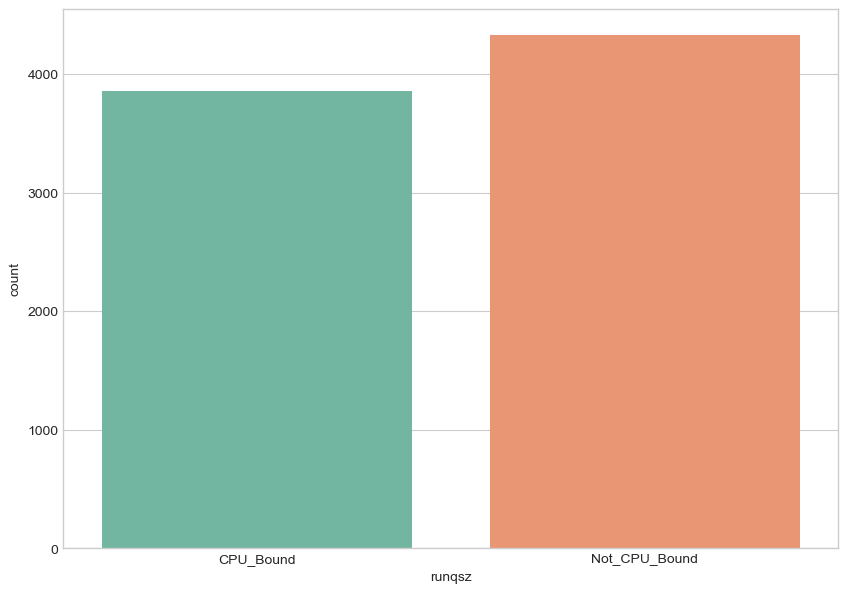

In [21]:
sns.countplot(x=df['runqsz'])

<Figure size 2000x1400 with 0 Axes>

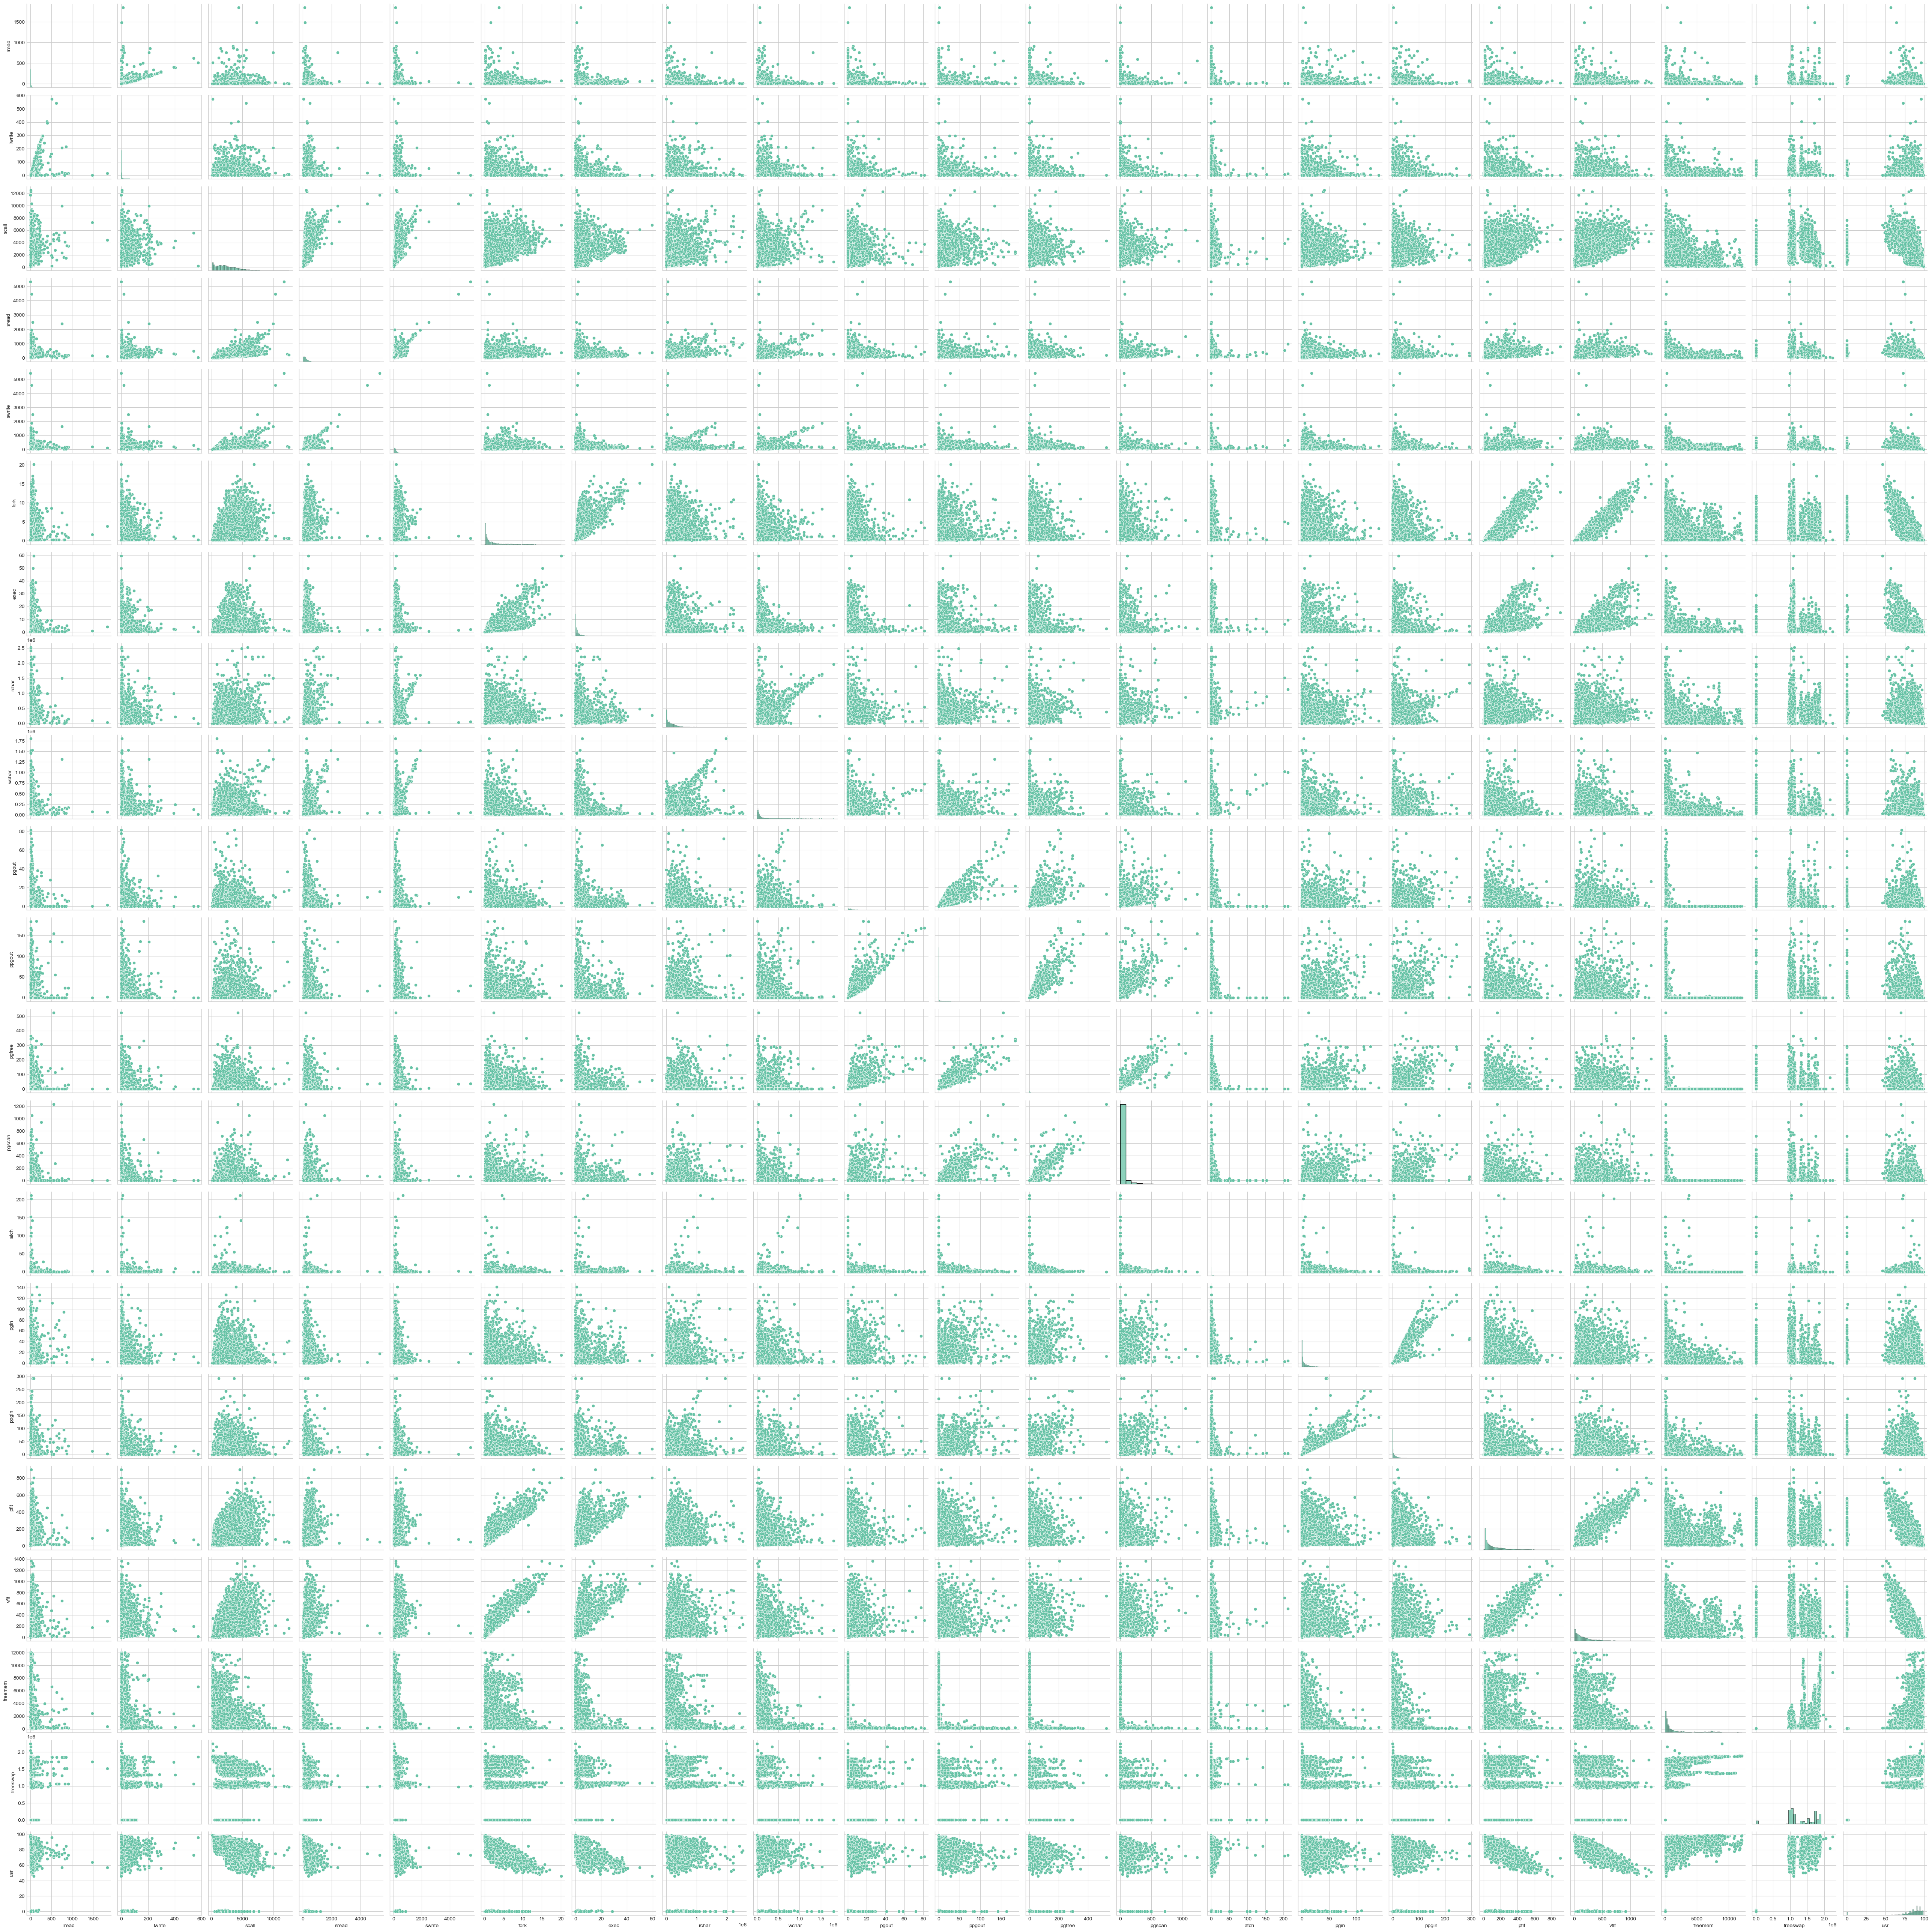

In [22]:
plt.figure(figsize=(20,14))
sns.pairplot(data=df)

In [23]:
df.corr()

lread    lwrite     scall     sread    swrite      fork  \
lread     1.000000  0.533737  0.191377  0.132881  0.119953  0.140284   
lwrite    0.533737  1.000000  0.143404  0.128403  0.101524  0.052511   
scall     0.191377  0.143404  1.000000  0.696887  0.619984  0.446766   
sread     0.132881  0.128403  0.696887  1.000000  0.881069  0.416721   
swrite    0.119953  0.101524  0.619984  0.881069  1.000000  0.376876   
fork      0.140284  0.052511  0.446766  0.416721  0.376876  1.000000   
exec      0.110965  0.038237  0.308999  0.164084  0.103643  0.763974   
rchar     0.107973  0.115121  0.351413  0.502397  0.331386  0.281229   
wchar     0.081571  0.091718  0.274092  0.401784  0.394230  0.060790   
pgout     0.082463  0.067013  0.194529  0.193679  0.151371  0.130192   
ppgout    0.130590  0.079485  0.208400  0.225906  0.159442  0.166872   
pgfree    0.114438  0.065692  0.199778  0.212911  0.145458  0.168082   
pgscan    0.087783  0.042608  0.177908  0.194272  0.120180  0.160839   
atch      0.021563  0.028310  0.077969  0.085468  0.061373  0.047194   
pgin      0.189799  0.091068  0.241628  0.207012  0.147000  0.163468   
ppgin     0.161345  0.089011  0.219070  0.210225  0.144278  0.132181   
pflt      0.137463  0.067024  0.481781  0.452020  0.396580  0.931040   
vflt      0.165539  0.094965  0.531760  0.491045  0.416571  0.939348   
freemem  -0.083214 -0.091133 -0.387520 -0.286437 -0.248574 -0.123357   
freeswap -0.081293 -0.116478 -0.350629 -0.302036 -0.237062 -0.130442   
usr      -0.141394 -0.111213 -0.323188 -0.332160 -0.272252 -0.363277   

              exec     rchar     wchar     pgout  ...    pgfree    pgscan  \
lread     0.110965  0.107973  0.081571  0.082463  ...  0.114438  0.087783   
lwrite    0.038237  0.115121  0.091718  0.067013  ...  0.065692  0.042608   
scall     0.308999  0.351413  0.274092  0.194529  ...  0.199778  0.177908   
sread     0.164084  0.502397  0.401784  0.193679  ...  0.212911  0.194272   
swrite    0.103643  0.331386  0.394230  0.151371  ...  0.145458  0.120180   
fork      0.763974  0.281229  0.060790  0.130192  ...  0.168082  0.160839   
exec      1.000000  0.169189  0.000547  0.111465  ...  0.146163  0.144855   
rchar     0.169189  1.000000  0.503531  0.211268  ...  0.277786  0.259446   
wchar     0.000547  0.503531  1.000000  0.192436  ...  0.159229  0.113638   
pgout     0.111465  0.211268  0.192436  1.000000  ...  0.730381  0.553916   
ppgout    0.149334  0.269160  0.188876  0.872445  ...  0.917790  0.785256   
pgfree    0.146163  0.277786  0.159229  0.730381  ...  1.000000  0.915217   
pgscan    0.144855  0.259446  0.113638  0.553916  ...  0.915217  1.000000   
atch      0.052307  0.171532  0.181408  0.147759  ...  0.069290  0.038693   
pgin      0.186099  0.299784  0.178290  0.385648  ...  0.532834  0.496826   
ppgin     0.149911  0.347224  0.200880  0.414865  ...  0.593396  0.564991   
pflt      0.645239  0.313246  0.086128  0.151285  ...  0.190468  0.179157   
vflt      0.691754  0.363799  0.111082  0.229129  ...  0.301851  0.283031   
freemem  -0.158565 -0.149485 -0.149060 -0.269687  ... -0.234195 -0.193580   
freeswap -0.153347 -0.220608 -0.226044 -0.245378  ... -0.210184 -0.178119   
usr      -0.288526 -0.329737 -0.288974 -0.221877  ... -0.216278 -0.181488   

              atch      pgin     ppgin      pflt      vflt   freemem  \
lread     0.021563  0.189799  0.161345  0.137463  0.165539 -0.083214   
lwrite    0.028310  0.091068  0.089011  0.067024  0.094965 -0.091133   
scall     0.077969  0.241628  0.219070  0.481781  0.531760 -0.387520   
sread     0.085468  0.207012  0.210225  0.452020  0.491045 -0.286437   
swrite    0.061373  0.147000  0.144278  0.396580  0.416571 -0.248574   
fork      0.047194  0.163468  0.132181  0.931040  0.939348 -0.123357   
exec      0.052307  0.186099  0.149911  0.645239  0.691754 -0.158565   
rchar     0.171532  0.299784  0.347224  0.313246  0.363799 -0.149485   
wchar     0.181408  0.178290  0.200880  0.086128  0.111082 -0.149060   
pgout     0.1

<AxesSubplot: >

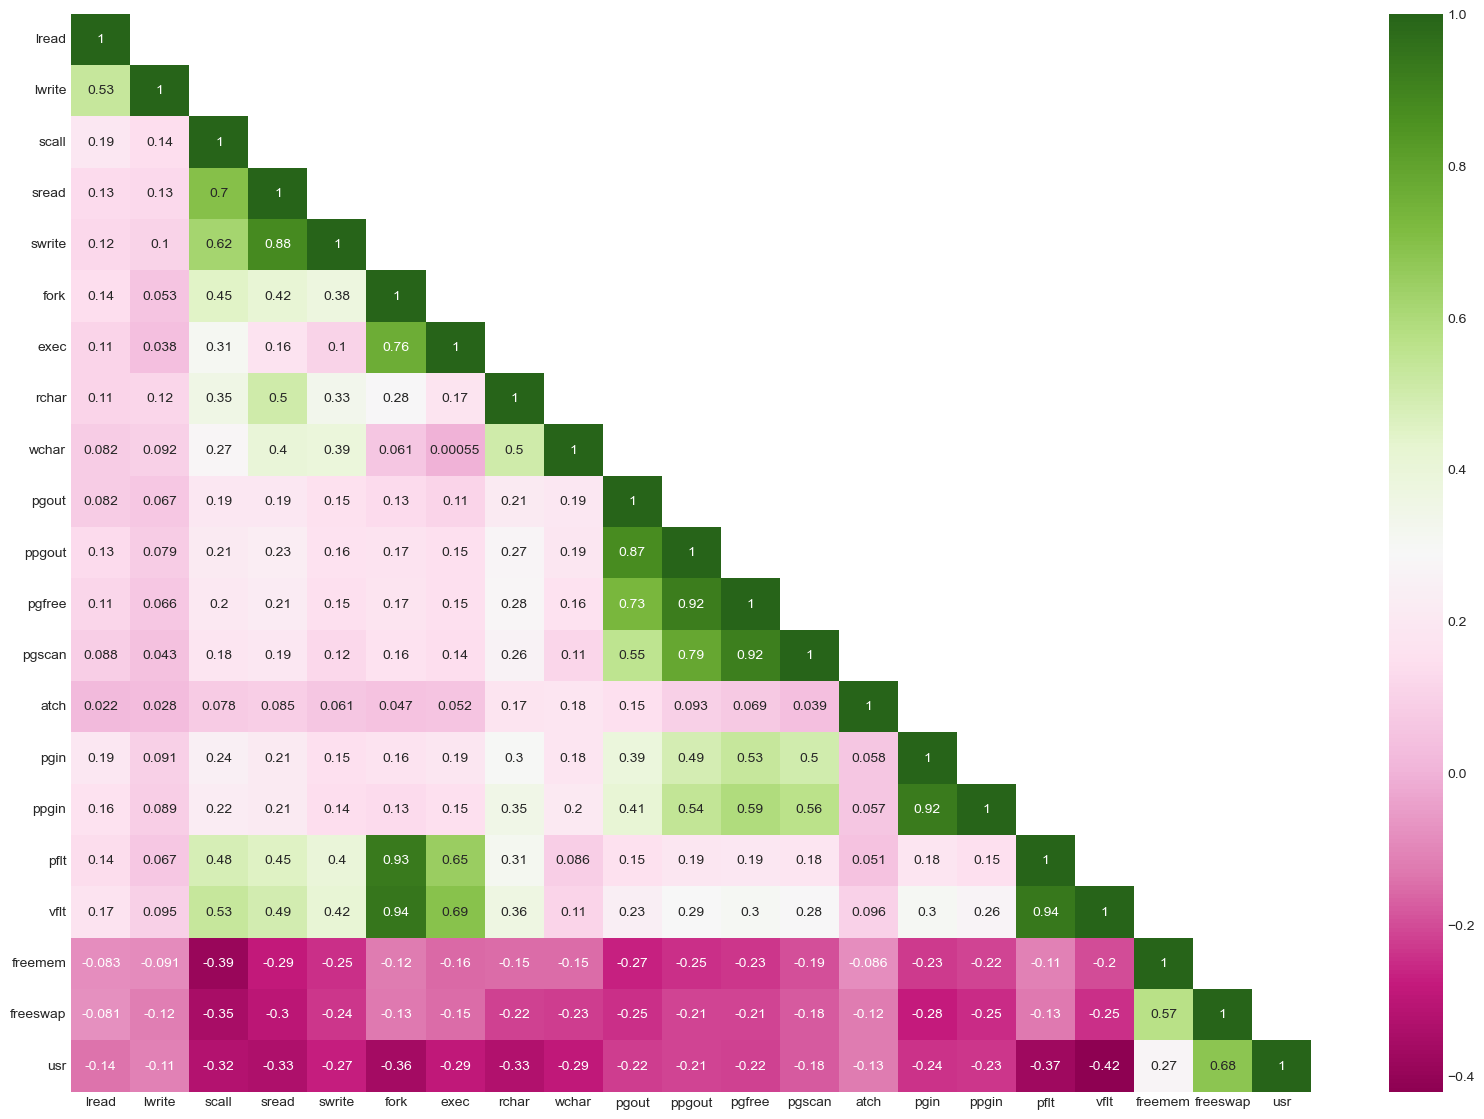

In [24]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,mask=np.triu(df.corr(),1),cmap="PiYG")

#### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

In [25]:
for col in df.columns:
    column = df[col]
    count = (column == 0).sum()
    print('Number of zeros in ',col,'=',count)

Number of zeros in  lread = 675
Number of zeros in  lwrite = 2684
Number of zeros in  scall = 0
Number of zeros in  sread = 0
Number of zeros in  swrite = 0
Number of zeros in  fork = 21
Number of zeros in  exec = 21
Number of zeros in  rchar = 0
Number of zeros in  wchar = 0
Number of zeros in  pgout = 4878
Number of zeros in  ppgout = 4878
Number of zeros in  pgfree = 4869
Number of zeros in  pgscan = 6448
Number of zeros in  atch = 4575
Number of zeros in  pgin = 1220
Number of zeros in  ppgin = 1220
Number of zeros in  pflt = 3
Number of zeros in  vflt = 0
Number of zeros in  runqsz = 0
Number of zeros in  freemem = 0
Number of zeros in  freeswap = 0
Number of zeros in  usr = 283


In [26]:
df.isnull().sum()[df.isnull().sum()>0]

rchar    104
wchar     15
dtype: int64

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df['rchar'] = imp.fit_transform(df['rchar'].values.reshape(-1,1))
df['wchar'] = imp.fit_transform(df['wchar'].values.reshape(-1,1))

In [29]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [30]:
#There are no null values.We have transformed all the null values to median of each column.

In [31]:
#We donot have to treat the zero values.The zero values in data set represents a value in each columns

In [32]:
#Checking for duplicated values

In [33]:
df.duplicated().sum()

0

In [34]:
#Outlier percentage is as shown below

In [35]:
outlier_percentage_df(df,num)

% OUTLIERS
pgscan       21.2891
pgfree       18.9819
ppgout       16.0522
lwrite       15.9302
atch         14.7583
freemem      14.4653
pgout        12.0605
fork         11.5112
ppgin        10.0220
wchar         9.9731
pgin          9.6313
lread         9.1919
exec          8.6670
swrite        6.0425
vflt          5.9082
rchar         5.6763
usr           5.2490
pflt          4.8218
sread         4.1504
freeswap      3.5889
scall         1.3184

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [37]:
df = pd.get_dummies(df, columns=['runqsz'], drop_first=True)
df.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.5  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.5   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  freeswap  usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40     4670   1730946   95   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83     7278   1869002   97   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20      702   1021237   87   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80     7248   1863704   98   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60      633   1760253   90   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 22 columns]

In [38]:
df.runqsz_Not_CPU_Bound

0       0
1       1
2       1
3       1
4       1
       ..
8187    0
8188    1
8189    1
8190    0
8191    0
Name: runqsz_Not_CPU_Bound, Length: 8192, dtype: uint8

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [39]:
#ENcoded data set

In [40]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.5  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.5   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  freeswap  usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40     4670   1730946   95   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83     7278   1869002   97   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20      702   1021237   87   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80     7248   1863704   98   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60      633   1760253   90   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 22 columns]

In [41]:
# independent variables
X = df.drop(['usr'], axis=1)
# dependent variable
y = df[['usr']]

In [42]:
# To build linear regression_model
import statsmodels.api as sm

In [43]:
# For randomized data splitting
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Using Linear Model from Sci-kit learn library

### Creating base model using sci-kit learn library 

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [46]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [47]:
regression_model.intercept_

array([44.63798454])

In [48]:
regression_model.coef_

array([[-1.98873283e-02,  4.79371418e-03,  1.00815134e-03,
        -4.70609776e-04, -2.04096786e-03, -1.72224970e+00,
        -8.96269805e-02, -4.06160177e-06, -1.16391775e-05,
        -1.73903805e-01,  9.89391175e-02, -7.03391933e-02,
         8.62333138e-03, -7.85628241e-02,  9.12669349e-02,
        -5.93811492e-02, -4.15086898e-02,  2.22839067e-02,
        -1.61716713e-03,  3.21923595e-05,  7.79079271e+00]])

### score on training set 

In [49]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.6428396267060905


In [50]:
n= len(X_train)
p = len(X.columns)
adj_R2_train = 1- ((1-regression_model.score(X_train, y_train)) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
print(adj_R2_train)

0.6415265370983922


### score on test set

In [51]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Train set 0.6312171006119722


In [52]:
n_t= len(X_test)
p_t = len(X.columns)
adj_R2_test = 1- ((1-regression_model.score(X_test, y_test)) * (n_t-1)/(n_t-p_t-1)) 

In [53]:
len(X_test)

2458

### RMSE train data

In [54]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_train,regression_model.predict(X_train))))

The Root Mean Square Error (RMSE) of the model is for testing set is 10.813213974052196


### RMSE test data

In [56]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 11.594013992326543


### Check Multi-collinearity using VIF

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [59]:
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

lread ---> 1.6908987027561138
lwrite ---> 1.699001485603914
scall ---> 6.877001373229604
sread ---> 14.547363229448845
swrite ---> 10.124595183290293
fork ---> 27.240468165153164
exec ---> 3.913433499729746
rchar ---> 3.3063930081779356
wchar ---> 2.283551277063242
pgout ---> 6.391567542317618
ppgout ---> 16.974221887939148
pgfree ---> 20.026075108710597
pgscan ---> 8.295350321770051
atch ---> 1.132026202911034
pgin ---> 10.368686136366367
ppgin ---> 10.65804444994972
pflt ---> 21.633868940087808
vflt ---> 34.70437350319657
freemem ---> 2.454765819032847
freeswap ---> 5.503994046193294
runqsz_Not_CPU_Bound ---> 2.080844104589491


###  Using statsmodel

In [60]:
# let's add the intercept to data
X_c = sm.add_constant(X)

In [61]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y, test_size=0.30, random_state=1)

### Train data OLS  - BASE MODEL

In [62]:
olsmod = sm.OLS(y_train_c, X_train_c)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     489.6
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:59:00   Log-Likelihood:                -21788.
No. Observations:                5734   AIC:                         4.362e+04
Df Residuals:                    5712   BIC:                         4.377e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.6380 

### Test data OLS  - BASE MODEL 

In [63]:
olsmod_test = sm.OLS(y_test_c, X_test_c)
olsres_test = olsmod_test.fit()
print(olsres_test.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     206.8
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:59:05   Log-Likelihood:                -9479.1
No. Observations:                2458   AIC:                         1.900e+04
Df Residuals:                    2436   BIC:                         1.913e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   39.2490 

In [64]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_c.values, i) for i in range(X_train_c.shape[1])],
    index=X_train_c.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   27.191591
lread                    1.472618
lwrite                   1.405898
scall                    2.414301
sread                    6.836403
swrite                   5.320692
fork                    18.210503
exec                     3.059950
rchar                    1.974726
wchar                    1.553348
pgout                    5.776005
ppgout                  15.906900
pgfree                  20.437584
pgscan                   9.237017
atch                     1.087328
pgin                     8.075699
ppgin                    8.672927
pflt                    11.834374
vflt                    20.233207
freemem                  1.677241
freeswap                 1.761193
runqsz_Not_CPU_Bound     1.118922
dtype: float64



### Checking the rmse before removing multicollinearity

In [65]:
# let us recreate the dataframe with actual, fitted and residual values
df_pred_1 = pd.DataFrame()

df_pred_1["Actual Values"] = y_train_c.values.flatten()  # actual values
df_pred_1["Fitted Values"] = olsres.fittedvalues.values  # predicted values
df_pred_1["Residuals"] = olsres.resid.values  # residuals

df_pred_1.head()

Actual Values  Fitted Values  Residuals
0             91      83.397386   7.602614
1             94      83.576344  10.423656
2              0      42.971134 -42.971134
3             83      72.705492  10.294508
4             94     102.942178  -8.942178

In [66]:
# let's check the RMSE on the train data-base model
rmse3 = np.sqrt(mean_squared_error(y_train_c, df_pred_1["Fitted Values"]))
rmse3

10.813213974052196

In [67]:
# let's make predictions on the test set-base model
y_pred = olsres.predict(X_test_c)

In [68]:
# let's check the RMSE on the test data-base model
rmse4 = np.sqrt(mean_squared_error(y_test_c, y_pred))
rmse4

11.594013992326595

In [69]:
# Removing the column with VIF

In [70]:
X_train_1 = X_train_c.drop('sread',axis=1)
ols_mod_1 = sm.OLS(y_train_c,X_train_1).fit()
print(
    "R-squared:",
    np.round(ols_mod_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(ols_mod_1.rsquared_adj, 3),
)

R-squared: 0.643 
Adjusted R-squared: 0.642


In [71]:
X_train_c = X_train_c.drop('sread',axis=1)

In [72]:
olsmod = sm.OLS(y_train_c, X_train_c)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     514.1
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:59:07   Log-Likelihood:                -21788.
No. Observations:                5734   AIC:                         4.362e+04
Df Residuals:                    5713   BIC:                         4.376e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.6332 

In [73]:
vif_series_2 = pd.Series(
    [variance_inflation_factor(X_train_c.values, i) for i in range(X_train_c.shape[1])],
    index=X_train_c.columns,
)
print("VIF values: \n\n{}\n".format(vif_series_2))

VIF values: 

const                   27.174347
lread                    1.471386
lwrite                   1.404635
scall                    2.222958
swrite                   1.967787
fork                    18.117240
exec                     3.057619
rchar                    1.677330
wchar                    1.546441
pgout                    5.749955
ppgout                  15.766171
pgfree                  20.397407
pgscan                   9.235295
atch                     1.086597
pgin                     8.070586
ppgin                    8.672913
pflt                    11.832565
vflt                    20.097655
freemem                  1.676978
freeswap                 1.756301
runqsz_Not_CPU_Bound     1.118913
dtype: float64



In [74]:
X_train_2 = X_train_c.drop('fork',axis=1)
ols_mod_2 = sm.OLS(y_train_c,X_train_2).fit()
print(
    "R-squared:",
    np.round(ols_mod_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(ols_mod_2.rsquared_adj, 3),
)

R-squared: 0.64 
Adjusted R-squared: 0.639


In [75]:
X_train_c = X_train_c.drop('fork',axis=1)

In [76]:
olsmod = sm.OLS(y_train_c, X_train_c)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     534.0
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:59:08   Log-Likelihood:                -21812.
No. Observations:                5734   AIC:                         4.366e+04
Df Residuals:                    5714   BIC:                         4.380e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   45.7087 

In [77]:
vif_series_3 = pd.Series(
    [variance_inflation_factor(X_train_c.values, i) for i in range(X_train_c.shape[1])],
    index=X_train_c.columns,
)
print("VIF values: \n\n{}\n".format(vif_series_3))

VIF values: 

const                   26.038039
lread                    1.460864
lwrite                   1.394975
scall                    2.159656
swrite                   1.887553
exec                     2.159388
rchar                    1.673138
wchar                    1.546421
pgout                    5.742687
ppgout                  15.765602
pgfree                  20.281897
pgscan                   9.223795
atch                     1.080160
pgin                     7.937151
ppgin                    8.656238
pflt                    10.529975
vflt                    13.803013
freemem                  1.676965
freeswap                 1.716885
runqsz_Not_CPU_Bound     1.118503
dtype: float64



In [78]:
X_train_3 = X_train_c.drop('ppgout',axis=1)
ols_mod_3 = sm.OLS(y_train_c,X_train_3).fit()
print(
    "R-squared:",
    np.round(ols_mod_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(ols_mod_3.rsquared_adj, 3),
)

R-squared: 0.639 
Adjusted R-squared: 0.638


In [79]:
X_train_c = X_train_c.drop('ppgout',axis=1)

In [80]:
vif_series_4 = pd.Series(
    [variance_inflation_factor(X_train_c.values, i) for i in range(X_train_c.shape[1])],
    index=X_train_c.columns,
)
print("VIF values: \n\n{}\n".format(vif_series_4))

VIF values: 

const                   25.857444
lread                    1.438947
lwrite                   1.394722
scall                    2.159633
swrite                   1.886188
exec                     2.151938
rchar                    1.672396
wchar                    1.544001
pgout                    2.918238
pgfree                  13.873015
pgscan                   9.205070
atch                     1.077038
pgin                     7.876637
ppgin                    8.595103
pflt                    10.525835
vflt                    13.802993
freemem                  1.676183
freeswap                 1.710848
runqsz_Not_CPU_Bound     1.118502
dtype: float64



In [81]:
X_train_4 = X_train_c.drop('pgfree',axis=1)
ols_mod_4 = sm.OLS(y_train_c,X_train_4).fit()
print(
    "R-squared:",
    np.round(ols_mod_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(ols_mod_4.rsquared_adj, 3),
)

R-squared: 0.639 
Adjusted R-squared: 0.638


In [82]:
X_train_c = X_train_c.drop('pgfree',axis=1)

In [83]:
vif_series_5 = pd.Series(
    [variance_inflation_factor(X_train_c.values, i) for i in range(X_train_c.shape[1])],
    index=X_train_c.columns,
)
print("VIF values: \n\n{}\n".format(vif_series_5))

VIF values: 

const                   25.720636
lread                    1.434824
lwrite                   1.394707
scall                    2.158085
swrite                   1.885920
exec                     2.144902
rchar                    1.671640
wchar                    1.542416
pgout                    1.602380
pgscan                   2.053271
atch                     1.075359
pgin                     7.873120
ppgin                    8.589668
pflt                    10.457629
vflt                    13.638734
freemem                  1.674986
freeswap                 1.702562
runqsz_Not_CPU_Bound     1.118501
dtype: float64



In [84]:
X_train_5 = X_train_c.drop('pgin',axis=1)
ols_mod_5 = sm.OLS(y_train_c,X_train_5).fit()
print(
    "R-squared:",
    np.round(ols_mod_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(ols_mod_5.rsquared_adj, 3),
)

R-squared: 0.638 
Adjusted R-squared: 0.637


In [85]:
X_train_c = X_train_c.drop('pgin',axis=1)

In [86]:
vif_series_6 = pd.Series(
    [variance_inflation_factor(X_train_c.values, i) for i in range(X_train_c.shape[1])],
    index=X_train_c.columns,
)
print("VIF values: \n\n{}\n".format(vif_series_6))

VIF values: 

const                   25.542024
lread                    1.417966
lwrite                   1.390366
scall                    2.156911
swrite                   1.883780
exec                     2.144290
rchar                    1.646768
wchar                    1.542380
pgout                    1.601278
pgscan                   2.013105
atch                     1.075252
ppgin                    1.781309
pflt                    10.177327
vflt                    13.084336
freemem                  1.674984
freeswap                 1.698102
runqsz_Not_CPU_Bound     1.117436
dtype: float64



In [87]:
olsmod = sm.OLS(y_train_c, X_train_c)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     630.2
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:59:11   Log-Likelihood:                -21825.
No. Observations:                5734   AIC:                         4.368e+04
Df Residuals:                    5717   BIC:                         4.380e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   45.8642 

In [88]:
X_train_6 = X_train_c.drop('pflt',axis=1)
ols_mod_6 = sm.OLS(y_train_c,X_train_6).fit()
print(
    "R-squared:",
    np.round(ols_mod_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(ols_mod_6.rsquared_adj, 3),
)

R-squared: 0.627 
Adjusted R-squared: 0.626


In [89]:
X_train_7 = X_train_c.drop('vflt',axis=1)
ols_mod_7 = sm.OLS(y_train_c,X_train_7).fit()
print(
    "R-squared:",
    np.round(ols_mod_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(ols_mod_7.rsquared_adj, 3),
)

R-squared: 0.637 
Adjusted R-squared: 0.636


In [90]:
X_train_c = X_train_c.drop('vflt',axis=1)

In [91]:
vif_series_7 = pd.Series(
    [variance_inflation_factor(X_train_c.values, i) for i in range(X_train_c.shape[1])],
    index=X_train_c.columns,
)
print("VIF values: \n\n{}\n".format(vif_series_7))

VIF values: 

const                   24.956967
lread                    1.417707
lwrite                   1.388806
scall                    2.139053
swrite                   1.866663
exec                     1.879404
rchar                    1.629041
wchar                    1.520177
pgout                    1.600713
pgscan                   1.963091
atch                     1.061898
ppgin                    1.752032
pflt                     2.331121
freemem                  1.674983
freeswap                 1.640324
runqsz_Not_CPU_Bound     1.117387
dtype: float64



In [92]:
olsmod_1 = sm.OLS(y_train_c, X_train_c)
olsres_1 = olsmod_1.fit()
print(olsres_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     669.5
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:59:12   Log-Likelihood:                -21832.
No. Observations:                5734   AIC:                         4.370e+04
Df Residuals:                    5718   BIC:                         4.380e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.2967 

In [93]:
X_train_8 = X_train_c.drop('lwrite',axis=1)
ols_mod_8 = sm.OLS(y_train_c,X_train_8).fit()
print(
    "R-squared:",
    np.round(ols_mod_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(ols_mod_8.rsquared_adj, 3),
)

R-squared: 0.637 
Adjusted R-squared: 0.636


In [94]:
X_train_c = X_train_c.drop('lwrite',axis=1)

In [95]:
olsmod_2 = sm.OLS(y_train_c, X_train_c)
olsres_2 = olsmod_2.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     717.1
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:59:12   Log-Likelihood:                -21833.
No. Observations:                5734   AIC:                         4.370e+04
Df Residuals:                    5719   BIC:                         4.380e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.4021 

In [96]:
X_train_9 = X_train_c.drop('pgscan',axis=1)
ols_mod_9 = sm.OLS(y_train_c,X_train_9).fit()
print(
    "R-squared:",
    np.round(ols_mod_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(ols_mod_9.rsquared_adj, 3),
)

R-squared: 0.637 
Adjusted R-squared: 0.636


In [97]:
X_train_c = X_train_c.drop('pgscan',axis=1)

In [98]:
olsmod_3 = sm.OLS(y_train_c, X_train_c)
olsres_3 = olsmod_3.fit()
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     772.2
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:59:13   Log-Likelihood:                -21834.
No. Observations:                5734   AIC:                         4.370e+04
Df Residuals:                    5720   BIC:                         4.379e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.4439 

In [99]:
X_train_10 = X_train_c.drop('ppgin',axis=1)
ols_mod_10 = sm.OLS(y_train_c,X_train_10).fit()
print(
    "R-squared:",
    np.round(ols_mod_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(ols_mod_10.rsquared_adj, 3),
)

R-squared: 0.637 
Adjusted R-squared: 0.636


In [100]:
X_train_c = X_train_c.drop('ppgin',axis=1)

In [101]:
olsmod_4 = sm.OLS(y_train_c, X_train_c)
olsres_4 = olsmod_4.fit()
print(olsres_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     836.7
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:59:14   Log-Likelihood:                -21834.
No. Observations:                5734   AIC:                         4.369e+04
Df Residuals:                    5721   BIC:                         4.378e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.4616 

In [102]:
vif_series_8 = pd.Series(
    [variance_inflation_factor(X_train_c.values, i) for i in range(X_train_c.shape[1])],
    index=X_train_c.columns,
)
print("VIF values: \n\n{}\n".format(vif_series_8))

VIF values: 

const                   24.248591
lread                    1.042021
scall                    2.133320
swrite                   1.864590
exec                     1.870264
rchar                    1.535714
wchar                    1.511129
pgout                    1.155515
atch                     1.055675
pflt                     2.314853
freemem                  1.672951
freeswap                 1.617955
runqsz_Not_CPU_Bound     1.116743
dtype: float64



In [103]:
#Check for the remaning columns in train set

In [104]:
X_train_c.columns

Index(['const', 'lread', 'scall', 'swrite', 'exec', 'rchar', 'wchar', 'pgout',
       'atch', 'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

### Creating OLS model using  test data

In [105]:
#First we will create ols model using all the availble columns

In [106]:
olsmod_11 = sm.OLS(y_test_c, X_test_c)
olsres_11 = olsmod_11.fit()
print(olsres_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     206.8
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:59:16   Log-Likelihood:                -9479.1
No. Observations:                2458   AIC:                         1.900e+04
Df Residuals:                    2436   BIC:                         1.913e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   39.2490 

In [107]:
X_test_c = X_test_c.drop(['sread','fork','ppgout','pgfree','pgin','vflt','lwrite','pgscan','ppgin'],axis=1)

In [108]:
olsmod_12 = sm.OLS(y_test_c, X_test_c)
olsres_12 = olsmod_12.fit()
print(olsres_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     349.8
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:59:16   Log-Likelihood:                -9508.8
No. Observations:                2458   AIC:                         1.904e+04
Df Residuals:                    2445   BIC:                         1.912e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   40.7254 

In [109]:
vif_series_9 = pd.Series(
    [variance_inflation_factor(X_test_c.values, i) for i in range(X_test_c.shape[1])],
    index=X_test_c.columns,
)
print("VIF values: \n\n{}\n".format(vif_series_9))

VIF values: 

const                   21.429674
lread                    1.061170
scall                    2.312943
swrite                   2.341281
exec                     1.927467
rchar                    1.556960
wchar                    1.710124
pgout                    1.159300
atch                     1.073984
pflt                     2.448040
freemem                  1.679357
freeswap                 1.567496
runqsz_Not_CPU_Bound     1.101741
dtype: float64



In [110]:
# let us recreate the dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train_c.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_4.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_4.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
0             91      84.389284   6.610716
1             94      84.218739   9.781261
2              0      44.511579 -44.511579
3             83      73.645770   9.354230
4             94     103.004225  -9.004225

In [111]:
# let's make predictions on the test set
y_pred = olsres_12.predict(X_test_c)

In [112]:
y_pred.mean()

83.55288852725533

In [113]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train_c, df_pred["Fitted Values"]))
rmse1

10.90097585158472

In [114]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test_c, y_pred))
rmse2

11.583408467772655

In [115]:
#Adj_r square of train set

In [116]:
round(olsres_4.rsquared_adj,3)

0.636

In [117]:
#Adj_r square of test set

In [118]:
round(olsres_11.rsquared_adj,3)

0.638

In [119]:
#r square of train set

In [120]:
round(olsres_4.rsquared,3)

0.637

In [121]:
#r square of test set

In [122]:
round(olsres_11.rsquared,3)

0.641

In [123]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.30, random_state=1)

In [124]:
X_test_b = X_test_b.drop(['sread','fork','ppgout','pgfree','pgin','vflt','lwrite','pgscan','ppgin'],axis=1)

In [125]:
X_train_b = X_train_b.drop(['sread','fork','ppgout','pgfree','pgin','vflt','lwrite','pgscan','ppgin'],axis=1)

In [126]:
regression_model_1 = LinearRegression()
regression_model_1.fit(X_train_b, y_train_b)

LinearRegression()

In [127]:
regression_model_2 = LinearRegression()
regression_model_2.fit(X_test_b, y_test_b)

LinearRegression()

In [128]:
regression_model_2.intercept_

array([40.72539792])

In [129]:
regression_model_2.coef_

array([[-1.53513810e-02,  1.40338271e-03, -2.41589875e-03,
        -1.22430902e-01, -1.58531549e-06, -9.19198353e-06,
        -1.54498183e-01,  5.50322353e-02, -4.16839155e-02,
        -1.77197280e-03,  3.46498091e-05,  8.35931600e+00]])

In [130]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model_1.score(X_train_b, y_train_b))

The coefficient of determination R^2 of the prediction on Train set 0.6370185515019653


In [131]:
print('The coefficient of determination R^2 of the prediction on Test set',regression_model_1.score(X_test_b, y_test_b))

The coefficient of determination R^2 of the prediction on Test set 0.6244067818352448


In [132]:
model_2_pred = regression_model_2.predict(X_test_b)

In [133]:
model_1_pred = regression_model_1.predict(X_train_b)

In [134]:
RMSE_Train_base = np.round(np.sqrt(mean_squared_error(y_train_b,model_1_pred)),2)
RMSE_Test_base = np.round(np.sqrt(mean_squared_error(y_test_b,model_2_pred)),2)


print('Training Data RMSE of model_base:',RMSE_Train_base )
print('Test Data RMSE of model_base:',RMSE_Test_base)

Training Data RMSE of model_base: 10.9
Test Data RMSE of model_base: 11.58


### Linear regression equation 

In [135]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train_c.columns)):
    if i == 0:
        print(olsres_4.params[i], "+", end=" ")
    elif i != len(X_train_c.columns) - 1:
        print(
            olsres_4.params[i],
            "* (",
            X_train_c.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_4.params[i], "* (", X_train_c.columns[i], ")")

usr = 46.46160190866891 + -0.01731562635082673 * ( lread ) +  0.0012228813935545313 * ( scall ) +  -0.003787461868611286 * ( swrite ) +  -0.2079981036627988 * ( exec ) +  -3.884513749041014e-06 * ( rchar ) +  -1.2038322893223802e-05 * ( wchar ) +  -0.12701651876594405 * ( pgout ) +  -0.05446972426887098 * ( atch ) +  -0.0401047952702351 * ( pflt ) +  -0.0016062898330734354 * ( freemem ) +  3.1263613790683524e-05 * ( freeswap ) +  7.715468801199788 * ( runqsz_Not_CPU_Bound )


## Refer next ipynb (PM PROJECT LOGISTIC REGRESSION VAISHNAV 12-02-23)for Logistic regression